<a href="https://colab.research.google.com/github/AliEbadi110/Natural-Language-Processing-Text-Classification-Sample-Projects/blob/main/NLP_Scikit_Learn_Text_Classification_Spam_Detection_TF_IDF_SVM_SMS_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP - Scikit Learn - Text Classification  - Spam Detection -  TF-IDF - SVM - SMS Spam**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

## 1. Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.drop(columns=['length', 'punct'], inplace=True)

## 2. Data Overview

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## 3. Target Variable Preprocessing

In [ ]:
df['label'].describe()

count     5572
unique       2
top        ham
freq      4825
Name: label, dtype: object

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: xlabel='count', ylabel='label'>

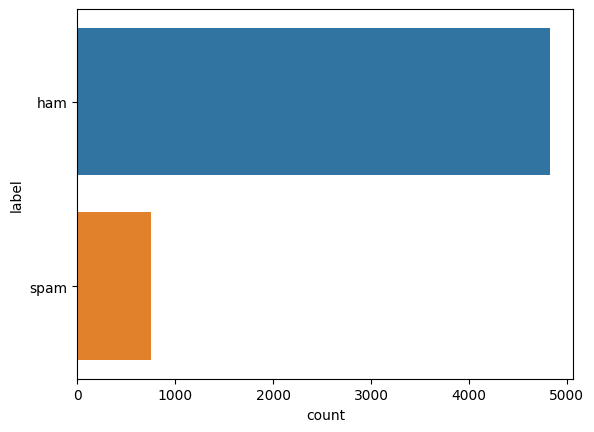

In [ ]:
sns.countplot(data=df, y='label')

In [ ]:
df.label.isnull().sum()

0

In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

## 4. Handling Missing Values

In [ ]:
df.isnull().sum()

label      0
message    0
dtype: int64

<Axes: >

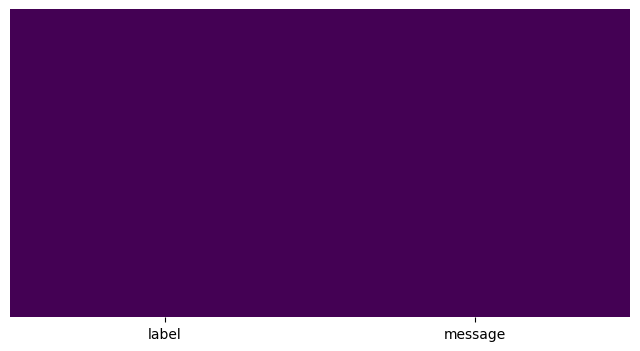

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 5. Text Preprocessing

In [ ]:
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words

In [ ]:
punctuations = string.punctuation

In [ ]:
def spacy_tokenizer(sentence):
  doc = nlp(sentence)
  mytokens = [word.lemma_.lower().strip() for word in doc]
  mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]
  return mytokens

## 6. Train_Test_Split

In [ ]:
y = df['label']
X = df['message']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

## 7. Feature Extraction

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)

In [ ]:
X_train_tfidf = vectorizer.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_tfidf

<3733x6536 sparse matrix of type '<class 'numpy.float64'>'
	with 30226 stored elements in Compressed Sparse Row format>

## 8. Define, Fit Model

In [ ]:
clf = LinearSVC()

In [ ]:
clf.fit(X_train_tfidf, y_train)

LinearSVC()

## 9. Predict, Evaluate

In [ ]:
predictions = clf.predict(vectorizer.transform(X_val))

In [ ]:
print(confusion_matrix(y_val, predictions))

[[1586    7]
 [  20  226]]


In [ ]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1593
           1       0.97      0.92      0.94       246

    accuracy                           0.99      1839
   macro avg       0.98      0.96      0.97      1839
weighted avg       0.99      0.99      0.99      1839

